In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

# Heatmaps

In [43]:
flight_dframe = sns.load_dataset('flights')

In [44]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [45]:
flight_dframe = flight_dframe.pivot('month', 'year', 'passengers')
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


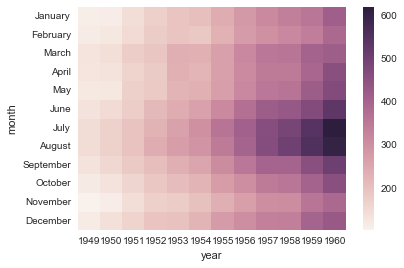

In [46]:
sns.heatmap(flight_dframe)

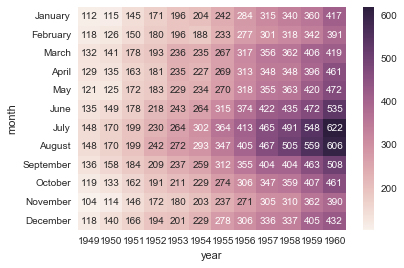

In [47]:
# annot + fmt
sns.heatmap(flight_dframe, annot=True, fmt='d')

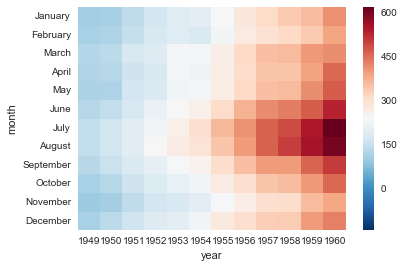

In [48]:
# 以1955為中心去調整顏色，可以試試看其它年份
sns.heatmap(flight_dframe, center=flight_dframe.loc['January', 1955])

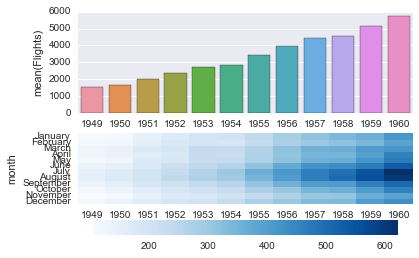

In [66]:
f, (axis1, axis2) = plt.subplots(2, 1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat([years, flights], axis=1)
year_dframe.columns = ['Year', 'Flights']

# Barplot vs Histograms: Barplot每個bar是分開的，沒有連在一起(x軸離散)
sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation': 'horizontal'})

# Custermap
Clustermap will reformat the heatmap so similar rows are next to each other

[None, None, None, None, None, None, None, None, None, None, None, None]

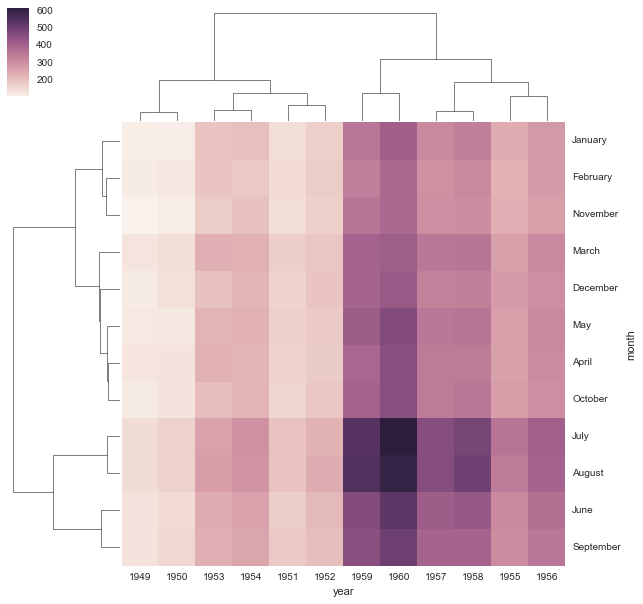

In [87]:
cg = sns.clustermap(flight_dframe)
# 將y label轉成水平
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

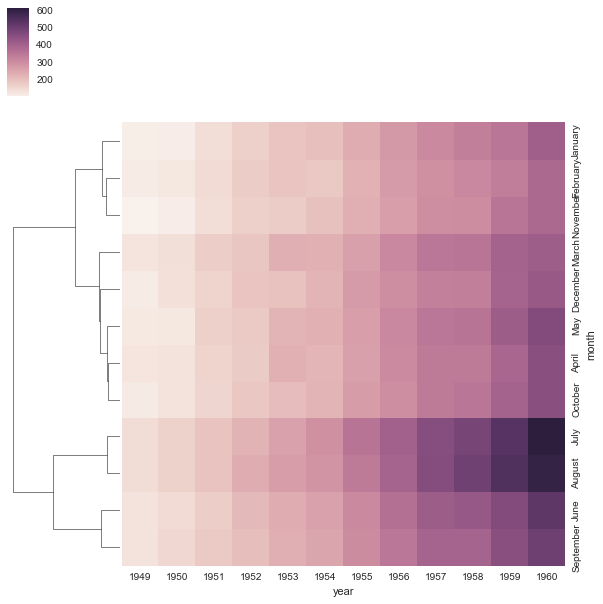

In [78]:
# 只cluster rows
sns.clustermap(flight_dframe, col_cluster=False)

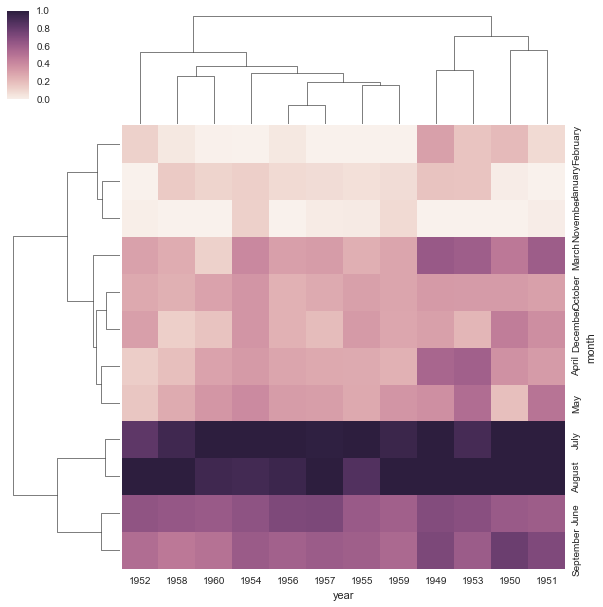

In [79]:
# 標準化columns
sns.clustermap(flight_dframe, standard_scale=1)

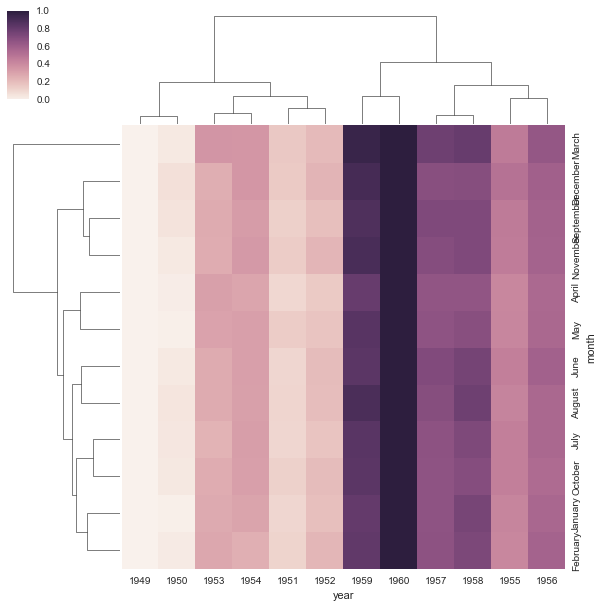

In [80]:
# 標準化rows
sns.clustermap(flight_dframe, standard_scale=0)

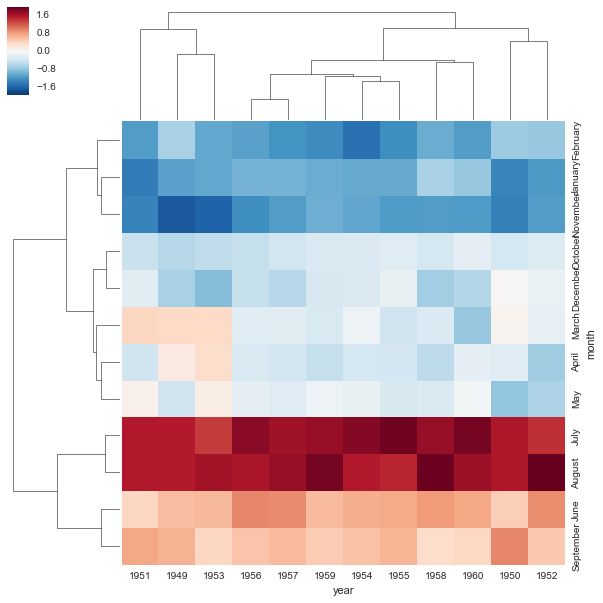

In [81]:
# Normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe, z_score=1)